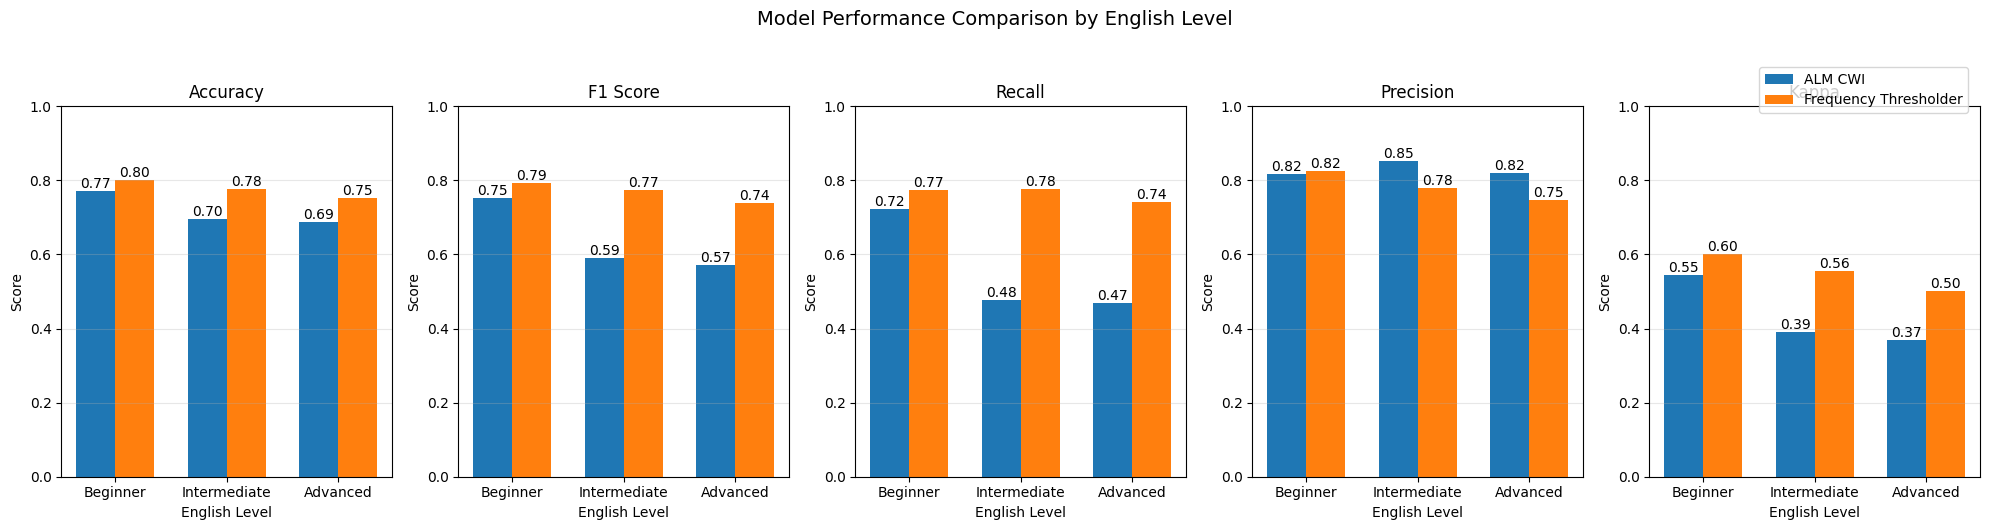

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast

# Load the data
df = pd.read_csv('metrics_log_new.csv')
df = df.iloc[5:]

# Function to extract first and second values from tuple-like strings
def extract_values(column):
    df[column + '_alm'] = df[column].apply(lambda x: ast.literal_eval(x)[0] if isinstance(x, str) else x[0])
    df[column + '_cwi'] = df[column].apply(lambda x: ast.literal_eval(x)[1] if isinstance(x, str) else x[1])

# Extract values for each metric
metrics = ['accuracy', 'f1_score', 'recall', 'precision', 'kappa']
for metric in metrics:
    extract_values(metric)

# Group by english_level and calculate means
grouped = df.groupby('english_level').agg({
    'accuracy_alm': 'mean',
    'accuracy_cwi': 'mean',
    'f1_score_alm': 'mean',
    'f1_score_cwi': 'mean',
    'recall_alm': 'mean',
    'recall_cwi': 'mean',
    'precision_alm': 'mean',
    'precision_cwi': 'mean',
    'kappa_alm': 'mean',
    'kappa_cwi': 'mean',
}).reset_index()

# Reorder english_level for better visualization
english_levels = ['Beginner', 'Intermediate', 'Advanced']
grouped['english_level'] = pd.Categorical(grouped['english_level'], categories=english_levels, ordered=True)
grouped = grouped.sort_values('english_level')

# Set up the plot
metrics_display = ['Accuracy', 'F1 Score', 'Recall', 'Precision', 'Kappa']
n_metrics = len(metrics_display)
n_groups = len(english_levels)

# Create figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=n_metrics, figsize=(20, 5))
fig.suptitle('Model Performance Comparison by English Level', y=1.05, fontsize=14)

# Set width of bars
bar_width = 0.35

# Colors
alm_color = '#1f77b4'
cwi_color = '#ff7f0e'

for i, metric in enumerate(metrics):
    ax = axes[i]
    
    # Get the positions for the bars
    positions = np.arange(n_groups)
    
    # Get the values for ALM and CWI
    alm_values = grouped[f'{metric}_alm']
    cwi_values = grouped[f'{metric}_cwi']
    
    # Plot bars
    alm_bars = ax.bar(positions - bar_width/2, alm_values, bar_width, 
                      color=alm_color, label='ALM CWI')
    cwi_bars = ax.bar(positions + bar_width/2, cwi_values, bar_width, 
                      color=cwi_color, label='Frequency Thresholder')
    
    # Add labels, title and custom x-axis tick labels
    ax.set_xlabel('English Level')
    ax.set_ylabel('Score')
    ax.set_title(metrics_display[i])
    ax.set_xticks(positions)
    ax.set_xticklabels(english_levels)
    ax.set_ylim(0, 1)
    
    # Add value labels on top of bars
    for bar in alm_bars + cwi_bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom')
    
    # Add grid
    ax.grid(axis='y', alpha=0.3)

# Add legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.99, 0.95))

plt.tight_layout()
plt.show()